In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras import utils

from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection 

# ML-CUP 

In [ ]:
#define mee loss function 
def mee(true_target, predicted_target):  # assuming target is 2-dim matrix with x and y as columns
    l = true_target.shape[0]
    res = 0

    for p in range(l):  # for p-th pattern in l (number of samples)
        x_diff = np.square(true_target[p, 0] - predicted_target[p, 0])  # difference between the x value of the true and predicted target
        y_diff = np.square(
            true_target[p, 1] - predicted_target[p, 1])  # difference between the y values of true and predicted target
        sum_term = x_diff + y_diff
        res = res + np.sqrt(sum_term)
    res = res / l

    return res

In [ ]:
#load training dataset
colnames = ['id', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'y1', 'y2']
df_ml_cup_train = pd.read_csv("./data/ML-CUP21-TR.csv", sep = ",", skipinitialspace=True, names = colnames)
df_ml_cup_train.drop(df_ml_cup_train.index[0:7], axis=0, inplace=True)
df_ml_cup_train.head()

,id,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,y1,y2
7,1,0.248433,-1.801874,-1.116485,1.255230,-1.021899,-1.425146,1.029583,1.261154,-0.185208,-0.618970,7.187592,-8.768943
8,2,0.612246,0.369337,1.119434,-0.689106,0.451776,1.308115,-0.518925,0.129025,-0.558788,1.588863,0.170888,-25.895562
9,3,-0.974871,0.275613,1.106435,-0.867804,0.230839,1.870421,-0.794584,-1.712529,-0.935208,0.109706,4.167006,-29.062891
10,4,-1.493339,1.992164,0.609691,-1.001476,1.268201,0.516364,-0.984814,-1.169440,-0.765422,-0.487069,7.259387,-31.529549
11,5,-0.432028,1.592409,0.853561,-1.365528,1.310392,0.954528,-0.946305,-1.269243,-2.031158,-0.227847,5.941430,-30.540759


In [ ]:
#check for mull values 
pd.isnull(df_ml_cup_train).sum()

id     0
a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
y1     0
y2     0
dtype: int64

In [ ]:
df_ml_cup_train.describe(include='all')

,id,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,y1,y2
count,1477,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
unique,1477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.255579,0.002654,0.133184,0.034346,-0.073823,0.130990,0.030048,0.099646,0.130991,0.210294,2.795525,-20.028458
std,NaN,0.956072,0.939628,1.052660,0.986982,0.830759,1.030170,0.969467,0.984523,0.999224,0.997632,2.985242,7.339448
min,NaN,-2.526427,-1.918939,-2.420890,-1.946351,-1.897417,-2.040401,-1.919660,-2.095531,-2.242666,-2.847029,-2.100573,-31.773589
25%,NaN,-0.402794,-0.861932,-0.766079,-0.908341,-0.802577,-0.823261,-0.916722,-0.804613,-0.804494,-0.490529,0.041258,-26.885766
50%,NaN,0.198597,0.058046,0.193591,0.140195,-0.022032,0.195010,0.130275,0.282215,0.326109,0.003434,2.739887,-19.944627
75%,NaN,0.880185,0.755629,1.064669,0.878915,0.605930,1.035666,0.855680,0.924605,0.891953,1.046291,5.415537,-13.588640


In [ ]:
X_all = df_ml_cup_train.iloc[:, 1:11].values
y_all = df_ml_cup_train.iloc[:, 11:13].values

# Visualize target data

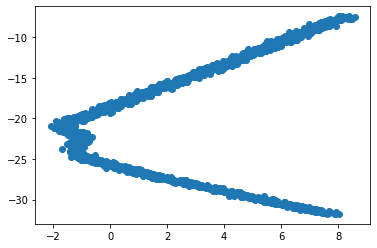

In [ ]:
plt.scatter(y_all[:,0], y_all[:,1])
plt.show()

In [ ]:
#shuffle and split data 
from sklearn.utils import shuffle 
X_all, y_all = shuffle(X_all, y_all)
train_size = int(0.9 * len(X_all))
X_train = X_all[:train_size]
y_train = y_all[:train_size]
print(X_train.shape, y_train.shape)
X_test = X_all[train_size:]
y_test = y_all[train_size:]
print(X_test.shape, y_val.shape)

(1107, 10) (1107, 2)
(370, 10) (24,)


In [ ]:
#definition of an early stopping calback and an eucledian distance metric to be used in KFold
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)
def euc_dist_keras(y_true, y_pred):
    return float(K.mean(K.sqrt(K.sum(K.square(y_true - y_pred), axis = -1, keepdims=True))))

In [ ]:
def create_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 1, 3)):
        if i == 1:
            model.add(layers.Dense(units=hp.Int('units', 10, 80, step=5), activation='relu', input_shape=(10,), kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(hp.Float('regularizer', 0.0001, 0.001, step=0.0005))))
            continue
        model.add(layers.Dense(units=hp.Int(f"units_{i}", 10, 80, step=5), activation='relu', kernel_regularizer=regularizers.l2(hp.Float(f"regularizer_{i}", 0.0001, 0.001, step=0.0005))))

    model.add(layers.Dense(2))
    hp_batch_size = hp.Int('bs', 10, 1000, step=20)
    hp_learning_rate  =hp.Float('learning_rate', min_value=0.00001, max_value=0.1, step=0.00005)
    hp_momentum = hp.Choice('momentum', values=[0.0, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9,])

    model.compile(optimizer=optimizers.SGD(learning_rate=hp_learning_rate, momentum=hp_momentum, decay=hp_learning_rate/100), loss=euc_dist_keras)
    return model

# Create a custom tuner that supports K-fold

In [ ]:
class CVTuner(keras_tuner.engine.tuner.Tuner):
    def run_trial(self, trial, X, y, batch_size, epochs):
        cv = model_selection.KFold(10)
        val_losses = []
        for train_indices, test_indices in cv.split(X):
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]
            model = self.hypermodel.build(trial.hyperparameters)
            bs = trial.hyperparameters['bs']
            print(bs)
            model.fit(X_train, y_train, batch_size=bs, epochs=epochs, verbose=0, callbacks=[es], validation_split=0.1)
            val_losses.append(model.evaluate(X_test, y_test))
        self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
        try:
            self.save_model(trial.trial_id, model)
        except:
            pass

In [ ]:
tuner = CVTuner(

    oracle=kt.oracles.RandomSearch(
        objective='val_loss',
        max_trials=1000,
    ),
    hypermodel=create_model,
    overwrite=True,
    project_name='keras_results',
)

tuner.search_space_summary()

TypeError: mee() missing 2 required positional arguments: 'true_target' and 'predicted_target'

In [ ]:
tuner.search(X_train, y_train, batch_size=32, epochs=200)
hyperparameters = tuner.get_best_hyperparameters(num_trials=30)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
layers            |3                 |?                 
units_0           |16                |?                 
learning_rate     |0.00163           |?                 
momentum          |0.5               |?                 



TypeError: in user code:

    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    <ipython-input-137-f962bd617275>:6 mee  *
        for p in range(l):  # for p-th pattern in l (number of samples)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/autograph/operators/py_builtins.py:365 range_  **
        return _py_range(start_or_stop, stop, step)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/autograph/operators/py_builtins.py:390 _py_range
        return range(start_or_stop)

    TypeError: 'NoneType' object cannot be interpreted as an integer


# Second random search

In [ ]:
#get the min and max of the best hyperparameters so far
min_lr = 1
max_lr = 0
min_mom = 1
max_mom = 0
min_layers = 4
max_layers = 0
min_reg = 1
max_reg = 0
min_batch = 1000
max_batch = 0
for hp in hyperparameters:
    if hp.get('regularizer') < min_reg:
        min_reg = hp.get('regularizer')
    if hp.get('regularizer') > max_reg:
        max_reg = hp.get('regularizer')
    if hp.get('learning_rate') < min_lr:
        min_lr = hp.get('learning_rate')
    if hp.get('learning_rate') > max_lr:
        max_lr = hp.get('learning_rate')
    if hp.get('momentum') < min_mom:
        min_mom = hp.get('momentum')
    if hp.get('momentum') > max_mom:
        max_mom = hp.get('momentum')
    if hp.get('layers') < min_layers:
        min_layers = hp.get('layers')
    if hp.get('layers') > max_layers:
        max_layers = hp.get('layers')
    if hp.get('bs') < min_batch:
        min_batch = hp.get('bs')
    if hp.get('bs') > max_batch:
        max_batch = hp.get('bs')
print("lr:", min_lr, max_lr)
print("momentum:", min_mom, max_mom)
print("layers:", min_layers, max_layers)
print("batch sieze", min_batch, max_batch)

In [ ]:
#do a second random search with the hyperparameters selected before as range
def create_model2(hp):
    model = Sequential()
    for i in range(hp.Int('layers', min_layers, max_layers)):
        if i == 1:
            model.add(layers.Dense(units=hp.Int('units', 10, 80, step=5), activation='relu', input_shape=(10,), kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(hp.Float('regularizer', min_reg, max_reg, step=0.0001))))
            continue
        model.add(layers.Dense(units=hp.Int(f"units_{i}", 10, 80, step=5), activation='relu', kernel_regularizer=regularizers.l2(hp.Float('regularizer', min_reg, max_reg, step=0.0001))))

    model.add(layers.Dense(2))
    hp_learning_rate  =hp.Float('learning_rate', min_value=min_lr, max_value=max_lr, step=0.0001)
    hp_momentum = hp.Float('momentum', min_value=min_mom, max_value=max_mom, step=0.02)
    hp_batch_size = hp.Int('bs', min_batch, max_batch, step=5)
    model.compile(optimizer=optimizers.SGD(learning_rate=hp_learning_rate, momentum=hp_momentum, decay=hp_learning_rate/100), loss=euc_dist_keras)
    return model

In [ ]:
tuner2 = CVTuner(
    oracle=keras_tuner.oracles.RandomSearch(
        objective='val_loss',
        max_trials=1000,
    ),
    hypermodel=create_model2,
    overwrite=True,
    project_name='keras_results2'
)

In [ ]:
tuner2.search(X_train, y_train, batch_size=32, epochs=100)
hyperparameters = tuner2.get_best_hyperparameters(num_trials=10)

In [ ]:
models = 0
y_total = []
mee_models = []
for hp in hyperparameters:
    models += 1
    model = create_model(hp)
    print("batch size")
    print(hp.get('bs'))
    train_loss = []
    test_loss = []
    for j in range(500):
        history = model.fit(X_train, y_train, batch_size=hp.get('bs'), verbose=0, epochs=1, validation_split=0.1, callbacks=[es])
        train_loss.append(history.history['loss'])
        score = model.evaluate(X_test, y_test)
        test_loss.append(score)
    #history = model.fit(X_train, y_train, batch_size=hp.get('bs'), epochs=500, verbose=0)
    model.summary()
    plt.plot(train_loss, '-', label='train')
    plt.plot(test_loss, '-.', label='test')
    plt.ylim([0,6])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    filename = "loss model_" + str(models) + ".png"
    plt.savefig(filename)
    plt.cla()
    y_pred = model.predict(X_test)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], color='blue')
    plt.scatter(y_test[:, 0], y_test[:, 1], color='red')
    filename = "prediction model_" + str(models) + ".png"
    plt.savefig(filename)
    plt.cla()
    res = mee(y_test, y_pred)
    print("mee loss model:", res)
    mee_models.append(res)
    y_total.append(y_pred)

y_mean = []
for i in  range(len(y_total[0])):
    temp = 0
    for x in y_total:
        temp += x[i]
    y_mean.append(temp / len(y_total))

y_mean = np.array(y_mean)
error = mee(y_test, y_mean)

# Ensemble by prediction average

In [ ]:
for i in range(len(mee_models)):
    print(mee_models[i])

print('ensemble error: ', error)


ensemble error:  1.1754376685932357


Text(0.5, 1.0, 'ensemble model prediction vs target values')

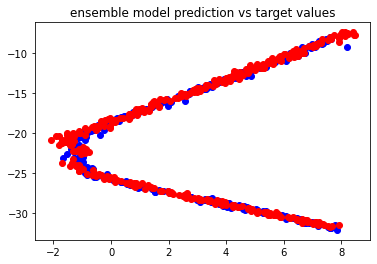

In [ ]:
#scatter plot comparing target values distribution and predicted values distribution
plt.scatter(y_mean[:,0], y_mean[:,1], color='blue')
plt.scatter(y_test[:,0], y_test[:,1], color='red')
plt.title('ensemble model prediction vs target values')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d840c9-75b3-4185-bb01-105f5cca8d83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>